<a href="https://colab.research.google.com/github/pranay-pherwani/CellGrowth/blob/main/Thetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import integrate
from mpl_toolkits import mplot3d
import random
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
!pip install pynverse
from pynverse import inversefunc
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib notebook

  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6362 sha256=a6e25985de4de0d31739523015e9c91cbdb38af51ed52e7fa41200abc526ce6b
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built pynverse


In [ ]:
%matplotlib inline
plt.close('all')

In [ ]:
def q0(th):
    if th <=1/2:
        return ((2-(2*c))*2*th)+c
    else:
        return q0(1-th)

def q1(th):
    if th<=1/2:
        return 1/(2*np.sqrt(2)*np.sqrt(th))
    else:
        return q1(1-th)
    
def q2(th):
    if th<=1/2:
        return (-1)*np.power(np.log(2),2)/(th*np.power(np.log(th),3))
    else:
        return q2(1-th)

In [ ]:
def uniform(U):
  return U

def u(U):
    if U <=1/2:
        return 2*(U**2)
    else: 
        #return q1_inverse(1-U)
        return 1-q1_inverse(1-U)
    
def w(U):
    if U <= 1/2:
        return np.power(math.e, (-np.log(2))* np.sqrt(2)/(2*np.sqrt(U)))
    else:
        return 1-w(1-U)

def triangle(U):
    c = 2
    if U<1/2:
        return (c - np.sqrt(c**2 - 8*c*U + 8*U))/(4*(c - 1))
    else:
        return 1-triangle(1-U)

In [ ]:
def genThetas(n,inv):
    thetas = stats.uniform(0,1).rvs(size=n).tolist()
    for i in range((len(thetas))):
        thetas[i]=inv(thetas[i])
    # for i in range(int(len(thetas)/2)):
    #     thetas[i]=inv(thetas[i])
    # for i in range(int(len(thetas)/2)+1,len(thetas)):
    #     thetas[i]=1-inv(thetas[i])
    return thetas

In [ ]:
z=genThetas(1000000,uniform)

Text(0.5, 1.0, 'Uniform')

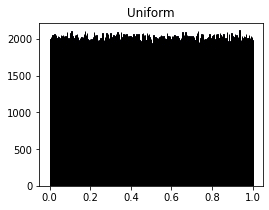

In [ ]:
fig, dx = plt.subplots(figsize=(4,3), sharex=False)
plt.hist(z, color = 'blue', edgecolor = 'black',bins = 500);
plt.title("Uniform")

In [ ]:
# SET BETA
beta = 0.5

def genTaus(n):
    taus = stats.expon(scale=2*beta).rvs(size=n).tolist()
    #taus.append(numpy.random.exponential(scale=2*beta,size=))
    # In the paper they start from tau_1,
    # so I added a 0 to align the indices
    taus.insert(0,0)
    return taus

In [ ]:
### Same additive different multiplicative
def growthFunctionM(m0,t,k):
    # return m0*np.exp(Lambda*t)
    return m0*(1+t)+t**k

trials = 1000
n= 100
m0 = 1

def distributionM(n,m0,trials,k):
    masses = []
    thetaList = genThetas(n*trials,u)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunctionM(mass,tau[i],k)
            mass = mass*theta[i]

        mass = growthFunctionM(mass,tau[-1],k)

        masses.append(mass)
    return masses

mass1 = distributionM(n,m0,trials,1)
mass2 = distributionM(n,m0,trials,2)
mass3 = distributionM(n,m0,trials,3)
mass4 = distributionM(n,m0,trials,4)
mass5 = distributionM(n,m0,trials,5)
mass6 = distributionM(n,m0,trials,6)
mass7 = distributionM(n,m0,trials,7)
mass8 = distributionM(n,m0,trials,8)
mass9 = distributionM(n,m0,trials,9)
mass10 = distributionM(n,m0,trials,10)


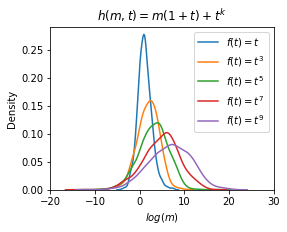

In [ ]:
fig, ux = plt.subplots(figsize=(4,3), sharex=False)
sns.kdeplot(np.log(mass1),label=r"$f(t)=t$")
#sns.kdeplot(np.log(mass2),label=r"$f(t)=1+t^2$")
sns.kdeplot(np.log(mass3),label=r"$f(t)=t^3$")
#sns.kdeplot(np.log(mass4),label=r"$f(t)=t^4$")
sns.kdeplot(np.log(mass5),label=r"$f(t)=t^5$")
#sns.kdeplot(np.log(mass6),label="f=t^6")
sns.kdeplot(np.log(mass7),label=r"$f(t)=t^7$")
#sns.kdeplot(np.log(mass8),label="f=t^8")
sns.kdeplot(np.log(mass9),label=r"$f(t)=t^9$")
#sns.kdeplot(np.log(mass10),label="f=t^10")
plt.title(r"$h(m,t)=m(1+t)+t^k$")
plt.xlabel(r"$log(m)$")
plt.xlim(left=-20,right=30)
plt.legend(loc='best')

In [ ]:
### Polynomials Overlayed

def growthFunctionP(m0,t):
    #return m0*np.exp(-t)
    #return m0*(1+t) + t
    return m0*np.exp(t)

trials = 10000
n= 1000
m0 = 1

def distribution(n,m0,trials,inv):
    masses = []
    thetaList = genThetas(n*trials,inv)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunctionP(mass,tau[i])
            mass = mass*theta[i]

        mass = growthFunctionP(mass,tau[-1])

        masses.append(mass)
    return masses

def logdistribution(n,m0,trials,inv):
    masses = []
    thetaList = genThetas(n*trials,inv)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = np.log(m0)
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = mass-tau[i]
            mass = mass + np.log(theta[i])

        mass = mass-tau[-1]

        masses.append(mass)
    return masses

massu = logdistribution(n,m0,trials,uniform)
mass0 = logdistribution(n,m0,trials,q0_inverse)
mass1 = logdistribution(n,m0,trials,q1_inverse)
mass2 = distribution(n,m0,trials,q2_inverse)

# massu = logdistribution(n,m0,trials,uniform)
# mass0 = logdistribution(n,m0,trials,q0_inverse)
# mass1 = logdistribution(n,m0,trials,q1_inverse)
# mass2 = logdistribution(n,m0,trials,q2_inverse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


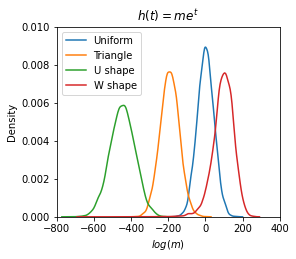

In [ ]:
fig, gx = plt.subplots(figsize=(4,3.5), sharex=False)
# sns.kdeplot(massu,label="Uniform")
# sns.kdeplot(mass0,label="Triangle")
# sns.kdeplot(mass1,label="U shape")
# sns.kdeplot(mass2,label="W shape")

sns.kdeplot(np.log(massu),label="Uniform")
sns.kdeplot(np.log(mass0),label="Triangle")
sns.kdeplot(np.log(mass1),label="U shape")
sns.kdeplot(np.log(mass2),label="W shape")

plt.xlabel(r"$log(m)$")
plt.xlim(left=-800,right=400)
plt.ylim(bottom=0,top=0.01)
plt.title(r"$h(t)=me^t$")
plt.legend(loc='best')

In [ ]:
def g0(t):
  return t
def g1(t):
  return -t
def g4(t):
    return np.power(t,2)
def g5(t):
    return np.log(1+t)
def g6(t):
    return np.log(1+np.log(1+t))

In [ ]:
trials = 10000
n= 1000
m0 = 1
thetaList = genThetas(n*trials,uniform)
def logdist(n,m0,trials,func):
    masses = []
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = 0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]

        for i in range(1,n):
            mass = mass+np.log(theta[i])+func(tau[i])

        mass = m0 * mass-func(tau[-1])

        masses.append(mass)
    return masses
logmass0 = logdist(n,m0,trials,g0)
logmass1 = logdist(n,m0,trials,g1)
logmass4 = logdist(n,m0,trials,g4)
logmass5 = logdist(n,m0,trials,g5)
logmass6 = logdist(n,m0,trials,g6)

In [ ]:
logmasses = [logmass0,logmass1,logmass4,logmass5,logmass6]
for mass in logmasses:
    for i in range(5):
        mass.remove(min(mass))

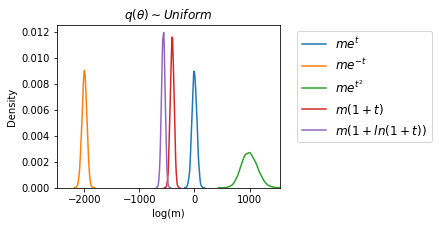

In [ ]:
fig, gx = plt.subplots(figsize=(4,3), sharex=False)
sns.kdeplot(logmass0,label=r'$me^t$')
sns.kdeplot(logmass1,label=r'$me^{-t}$')
sns.kdeplot(logmass4,label=r'$me^{t^2}$')
sns.kdeplot(logmass5,label=r'$m(1+t)$')
sns.kdeplot(logmass6,label=r'$m(1+ln(1+t))$')
plt.title(r'$q(\theta)\sim Uniform$')
plt.xlabel("log(m)")
plt.xlim(left=-2500,right=1550)
plt.legend(bbox_to_anchor=(1.05, 1),prop={'size': 12})